In [114]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [115]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

### Question 1 Counting objects

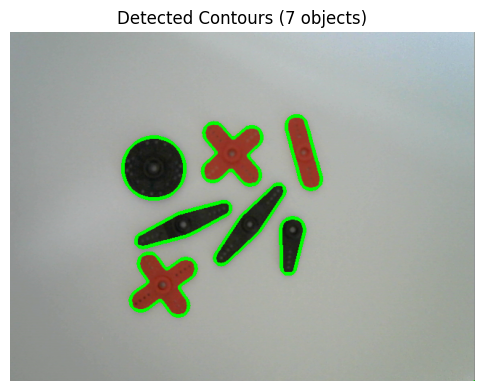

Number of objects for image 1: 7


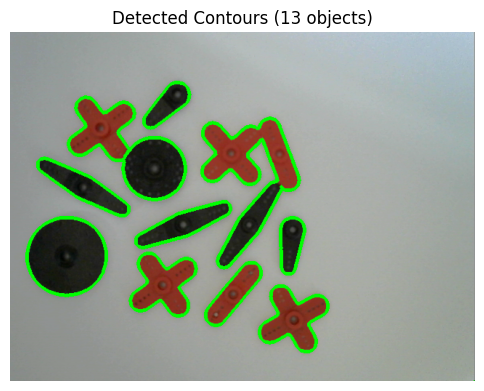

Number of objects for image 2: 13


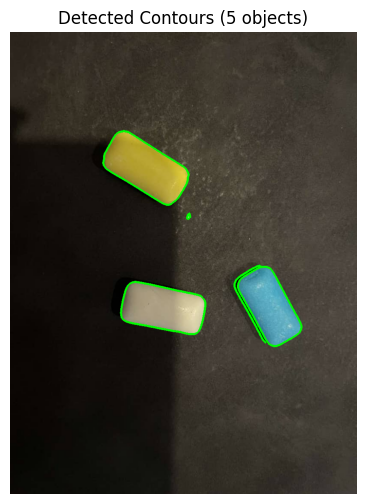

Number of objects for Real world image: 5


Number of objects for Real world image with clear background: 3


In [ ]:
'''At a busy logistics warehouse, workers struggle to count packages manually, leading to
errors and delays. To solve this, a computer vision system is deployed. Cameras capture images of stacks of boxes,
and an object detection algorithm uses edge detection
and contour analysis to count them automatically. This improves efficiency, ensuring
that shipments are tracked accurately and reducing the risk of lost inventory. You
have just been hired as a computer vision engineer and your task is to help them solve
this problem. One of the naive ways is to find contours of objects and counting them.
In this section, we will be implementing this naive method.
1. Load an image using OpenCV.
2. Convert the image to grayscale for easier processing.
3. Apply Gaussian blur to reduce noise and improve edge detection.
4. Use Canny Edge Detection to extract contours.
5. Find contours in the image and count them as individual objects

Although the above method might work in some cases, you are expected to explore
other image processing techniques to improve the object counting algorithm. We
present two types of scenarios, one where all the objects are separated from each other
(see Fig. 1) and one where some or all of the objects are touching each other (see Fig.
2). In all cases, the scene background will be white. Equal marks will be awarded for
the ability of the application to count the number of objects in the first (separated) and
second (touching) scenarios. We recommend you try to include some morphological
operations in the image processing to improve your counting algorithm.
Tasks
1. Implement the naive object counting algorithm above.
2. Experiment with different parameters of the filters you use and various image
processing techniques and report how they help improve your counting algorithm.
3. Real world experimentation: Put some items on a table with a plain background,
take a picture using your smart phone and count the number of items.
4. Report on the difficulties faced by the naive counting algorithm in real world
example and how it could be improved.
5. Suggest other real world scenarios where counting objects could be helpful.

'''


## Sample images in Data directory
def count_objects(image_path):
    # Load the image using opencv
    img = cv2.imread(image_path)
    if img is None:
        print("Error: Image not loaded. Please check the file path.")
        return None
    # Convert the image to grayscale for easier processing
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Apply GaussianBlur to reduce noise and help contour detection
    blurred = cv2.GaussianBlur(gray, (11, 11), 0)
    # Use Canny edge detection (we could also use Sobel)
    edges = cv2.Canny(blurred, 50, 95)
    # Find contours in the edges, this can help to detect the edges
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Draw contours on the original image
    img_contours = img.copy()
    cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 3)

    # Visualize the image with contours
    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
    plt.title(f"Detected Contours ({len(contours)} objects)")
    plt.axis('off')
    plt.show()

    # Return the count of objects (contours)
    count = len(contours)
    return count

# Load sample images
img_path1 = 'q1_data/1a.png'
img_path2 = 'q1_data/1b.png'
img_path3 = 'q1_data/1c.jpg'
img_path4 = 'q1_data/1d.jpg'  # Real world experimentation

# Print the number of objects
print(f"Number of objects for image 1: {count_objects(img_path1)}")
print(f"Number of objects for image 2: {count_objects(img_path2)}")
print(f"Number of objects for Real world image: {count_objects(img_path3)}")
print(f"Number of objects for Real world image with clear background: {count_objects(img_path4)}")


### Question 2 Image Straightening

In [5]:

'''Image quality is a very important input to machine learning models. In this part of
the assignment, we will explore how we can automatically callibrate some images to
help get better performance from an AI model. After completing the computer vision
course, you develop an AI-powered chess coach that needs to analyze board positions
from a camera feed. However, due to varying camera angles, the chessboard often
appears tilted. To fix this, the system detects the board’s grid lines using the Hough
Transform and calculates the necessary rotation. By automatically straightening the
board, your AI can correctly identify piece positions and suggest optimal moves to
players. We will use the following naive algorithm to straighten the chess board.
1. Convert the image to grayscale. (Ofcourse after reading the image).
2. Apply Gaussian Blur and contrast enhancement using CLAHE.
3. Use Canny Edge Detection to identify edges in the image.(Experiment with
Sobel)
4. Apply the Hough Transform to detect lines in the image.
5. Store and analyze angles of detected lines to determine the dominant orientations.
6. Apply image rotation to correct the perspective.
In Fig 3 and Fig 4 we can see some of the expected results. You are provided with 3
different images to experiment with
Tasks
1. Implement the straightening algorithm above.
2. Experiment with different parameters of the filters you use and various image
processing techniques and report how they help improve your straightening algorithm.
3. Real world experimentation: Find an object with which has lines like a square,
rotate it and use your implementation to automatically straighten it.
4. Report on the difficulties faced by the naive straightening algorithm in the real
world example and how it could be improved.
5. Suggest other real world scenarios where aligning and image can be helpful.
'''
def find_lines(image_path):
    # Load the image using opencv
    img = cv2.imread(image_path)
    # Convert the img to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Preprocessing Steps
    # Apply Gaussian Blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    # Contrast Enhancement using CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(blurred)
    # Apply Canny Edge Detection
    edges = cv2.Canny(enhanced, 100, 200)
    #Optional to enhance the edges using morphological operations. Should be applied with care
    # Apply Morphological Operations (Dilation + Erosion)
    # kernel = #Not implemented
    # dilated = #not implemented
    # eroded = #Not implemented
    # Apply Hough Transform to detect lines
    # This returns an array of r and theta values
    lines = cv2.HoughLines(edges, 1, np.pi / 175, 275)
    # The below for loop runs till r and theta values
    # are in the range of the 2d array
    angles_count = {}
    for r_theta in lines:
        arr = np.array(r_theta[0], dtype=np.float64)

        r, theta = arr
        #Convert Polar Coordinates to Cartesian Coordinates
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*r
        y0 = b*r
        #Store the angles in a dictionary to count the number of lines corresponding to that angle
        if theta in angles_count.keys():
            angles_count[theta] += 1
        else:
            angles_count[theta] = 1
        # Second point needed to draw the line

        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))

        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        # Draw the line on the image
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
    cv2.imwrite('linesDetected.jpg', img)
    # return the angles_count dictionary
    return angles_count


angles_count = find_lines('q2_data/2a.jpg')
top_3_angles = sorted(angles_count, key=angles_count.get, reverse=True)[:3]
img = cv2.imread('linesDetected.jpg')

In [6]:
# convert top angle go degrees for rotation
angle = top_3_angles[0] * 180 / np.pi

In [8]:
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)

    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, rotation_matrix, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REPLICATE)
    return rotated
#rot_img = rotate_image(img, angle)
#show rot_img
#plt.imshow(rot_img,cmap='gray')

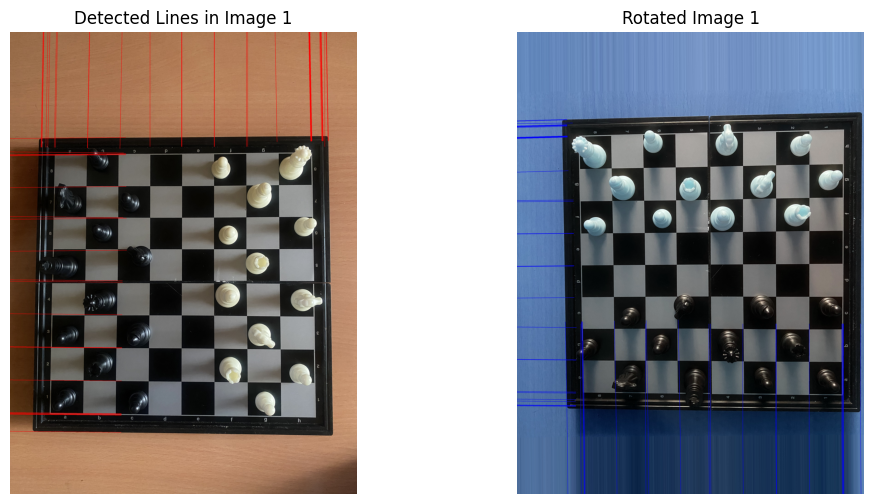

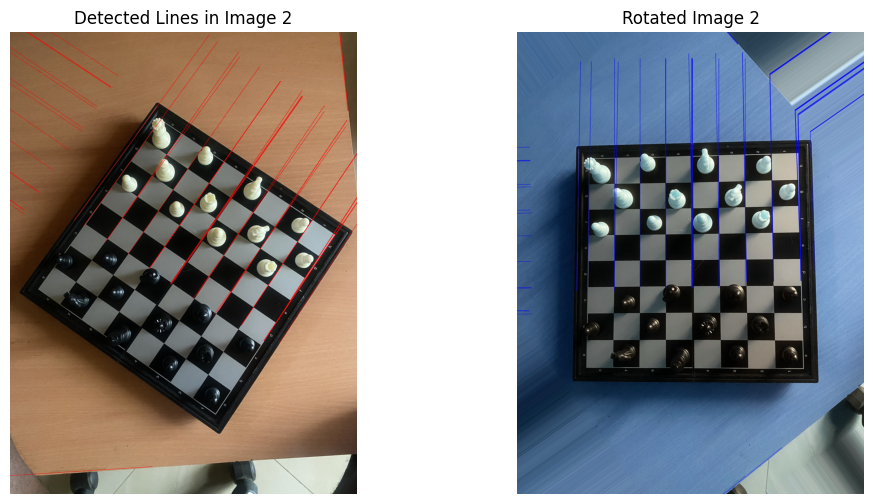

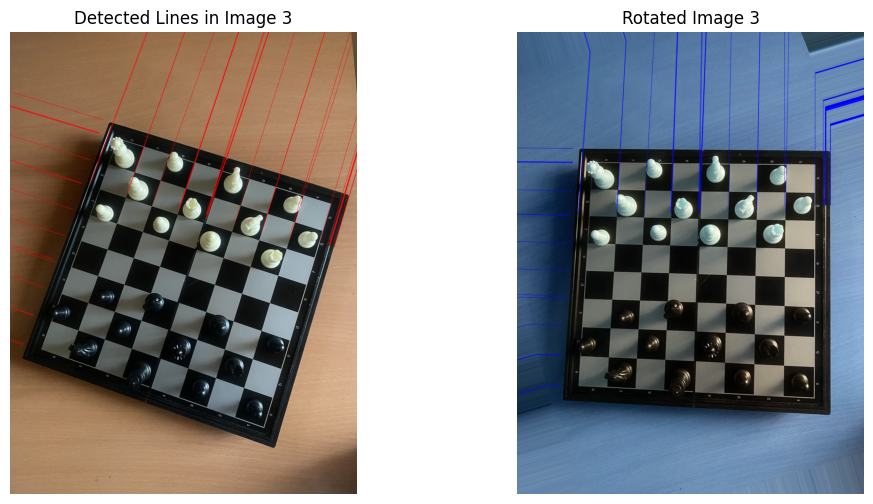

In [9]:
# Experiment with the images given
rot_img1 = rotate_image(img, angle)

# Image 1
angles_count1 = find_lines('q2_data/2a.jpg')
top_3_angles1 = sorted(angles_count1, key=angles_count1.get, reverse=True)[:3]
img1 = cv2.imread('linesDetected.jpg')
angle1 = top_3_angles1[0] * 180 / np.pi
rot_img1 = rotate_image(img1, angle1)

# Plot detected lines and rotated image for Image 1
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for detected lines (Image 1)
axes[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
axes[0].set_title("Detected Lines in Image 1")
axes[0].axis('off')

# Plot for rotated image (Image 1)
axes[1].imshow(rot_img1, cmap='gray')
axes[1].set_title("Rotated Image 1")
axes[1].axis('off')

plt.show()

# Image 2
angles_count2 = find_lines('q2_data/2b.jpg')
top_3_angles2 = sorted(angles_count2, key=angles_count2.get, reverse=True)[:3]
img2 = cv2.imread('linesDetected.jpg')
angle2 = top_3_angles2[0] * 180 / np.pi
rot_img2 = rotate_image(img2, angle2)

# Plot detected lines and rotated image for Image 2
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for detected lines (Image 2)
axes[0].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
axes[0].set_title("Detected Lines in Image 2")
axes[0].axis('off')

# Plot for rotated image (Image 2)
axes[1].imshow(rot_img2, cmap='gray')
axes[1].set_title("Rotated Image 2")
axes[1].axis('off')

plt.show()

# Image 3
angles_count3 = find_lines('q2_data/2c.jpg')
top_3_angles3 = sorted(angles_count3, key=angles_count3.get, reverse=True)[:3]
img3 = cv2.imread('linesDetected.jpg')
angle3 = top_3_angles3[0] * 180 / np.pi
rot_img3 = rotate_image(img3, angle3)

# Plot detected lines and rotated image for Image 3
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for detected lines (Image 3)
axes[0].imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
axes[0].set_title("Detected Lines in Image 3")
axes[0].axis('off')

# Plot for rotated image (Image 3)
axes[1].imshow(rot_img3, cmap='gray')
axes[1].set_title("Rotated Image 3")
axes[1].axis('off')

plt.show()

# Image 4 - Real World Example
angles_count4 = find_lines('q2_data/2d.jpg')
top_3_angles4 = sorted(angles_count4, key=angles_count4.get, reverse=True)[:3]
img4 = cv2.imread('linesDetected.jpg')
angle4 = top_3_angles4[0] * 180 / np.pi
rot_img4 = rotate_image(img4, angle4)

# Plot detected lines and rotated image for Image 4 (Real World Example)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for detected lines (Image 4)
axes[0].imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
axes[0].set_title("Detected Lines in Real World Image")
axes[0].axis('off')

# Plot for rotated image (Image 4)
axes[1].imshow(rot_img4, cmap='gray')
axes[1].set_title("Rotated Real World Image")
axes[1].axis('off')

plt.show()

### Question 3 Image compression

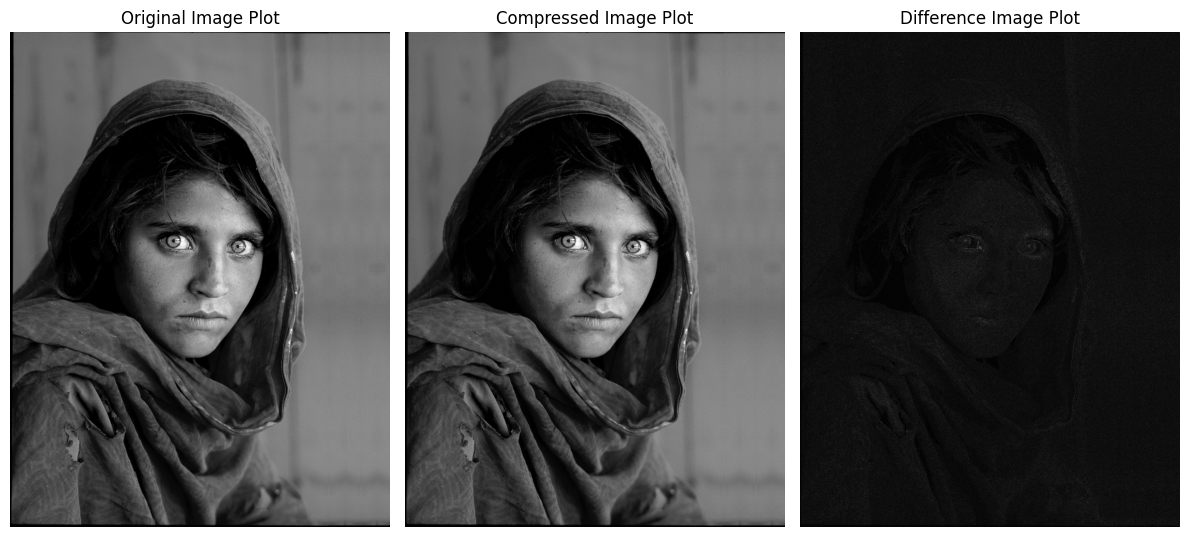

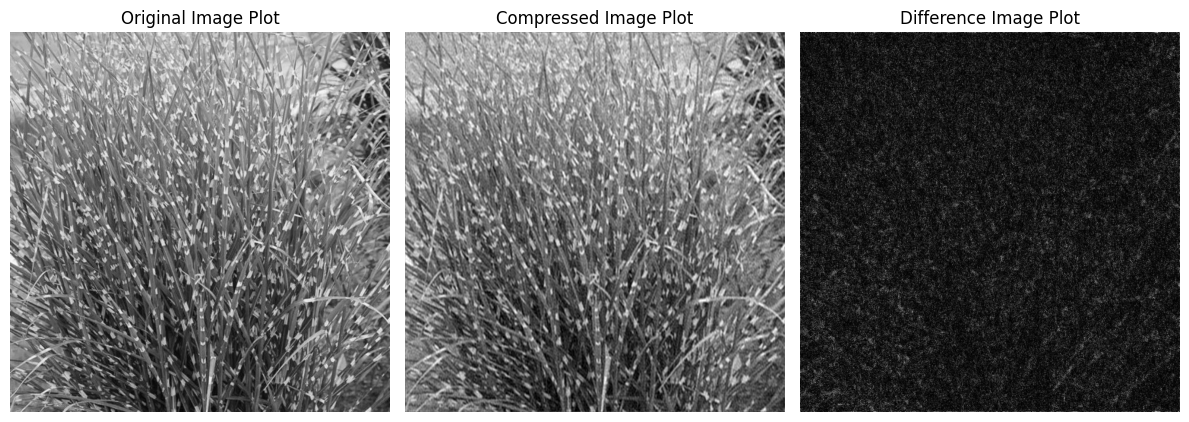

Using a high frequency image, compress it and compare the compression performance with low frequency image
Low frequency Compression


High frequency Compression


high resolution satellite image with high frequency compression


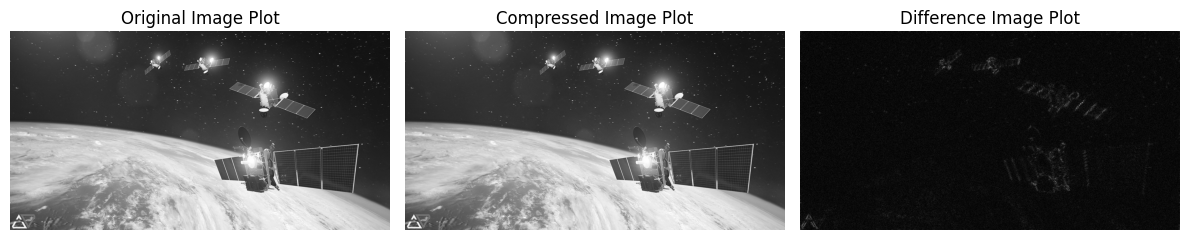

In [ ]:
'''The Fourier Transform is an important image processing tool which is used to decompose an image into its
 sine and cosine components. The output of the transformation
represents the image in the Fourier or Frequency domain, while the input image is
the spatial domain equivalent. In the Fourier domain image, each point represents a
particular frequency contained in the spatial domain image.
The Fourier Transform is used in a wide range of applications, such as image analysis,
image filtering, image reconstruction and image compression. Fourier transform breaks
down an image into its frequency domain. Within this domain, we can eliminate
unimportant frequencies, effectively removing data from the image. By reconstructing
the image with fewer frequencies, we achieve a “compressed” version of the image.
You work in a space agency and receives thousands of high-resolution images from
Earth observation satellites every day. Storing and transmitting these massive images
is expensive and slow. You decided to use Fourier-based image compression to remove
less significant details while preserving critical features like coastlines and roads. This
reduces data size, allowing faster transmission and efficient storage without losing
essential geographic information.
Tasks
1. Convert the image to gray scale (After reading the image start with low frequency
image).
2. Compute the Fast Fourier Transform (FFT) to analyze frequency components.
3. Apply a threshold to retain significant frequency components while discarding
others.
4. Apply inverse Fourier Transform to reconstruct a compressed image.
5. Using a high frequency image, compress it and compare the compression performance with low frequency image.
6. Find a high resolution satellite image online, compress it using your algorithm
and report on its performance
'''
## Sample images  in Data directory
def compress_image(image_path, compress_ratio):
    # Load image using imread
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Convert image to grayscale
    # Use numpy to get the fast fourier transform of the grayscale image
    ff_img = np.fft.fft2(img)
    # Sort the absolute value of  the frequencies. You will have to flatten the frequencies => fSorted
    fSort = np.sort(np.abs(ff_img).flatten())
    # Determine the threshold to keep using thresh = fSorted[int(np.floor((1-compress_ration)*len(fSorted)))]
    threshold = fSort[int(np.floor((1-compress_ratio) * len(fSort)))]
    # create a mask to help filter. mask = np.abs(computed_fourier) >  thresh
    mask = np.abs(ff_img) > threshold
    # filter the Fourier using the mask filtered = computer_fourier * mask
    filtered = ff_img * mask
    # apply inverse fourier to get a compressed version of the image
    compressed_img = np.fft.ifft2(filtered).real
    # return the image obtained.
    compressed_img = np.clip(compressed_img, 0, 255).astype(np.uint8)
    return compressed_img

# Test
def visualize_compression_diff(img_path, compression_factor=0.1):
    # Compress the image (assuming compress_image is defined elsewhere)
    compressed_img = compress_image(img_path, compression_factor)

    # Load the original image in grayscale
    original_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Compute the difference image
    diff_img = np.abs(original_img.astype(np.float32) - compressed_img.astype(np.float32))

    # Convert to uint8 for better visualization
    diff_img = np.clip(diff_img, 0, 255).astype(np.uint8)

    # Create a figure with custom size
    plt.figure(figsize=(12, 6))

    # Show the original image   
    plt.subplot(131)  # 1 row, 3 columns, first subplot
    plt.imshow(original_img, cmap='gray')
    plt.title('Original Image Plot')
    plt.axis('off')  # Hide axes

    # Show the compressed image
    plt.subplot(132)  # 1 row, 3 columns, second subplot
    plt.imshow(compressed_img, cmap='gray')
    plt.title('Compressed Image Plot')
    plt.axis('off')  # Hide axes

    # Show the difference image
    plt.subplot(133)  # 1 row, 3 columns, third subplot
    plt.imshow(diff_img, cmap='gray')
    plt.title('Difference Image Plot')
    plt.axis('off')  # Hide axes


    plt.tight_layout()
    plt.show()

visualize_compression_diff("q3_data/q3a.jpg", compression_factor=0.1)
visualize_compression_diff("q3_data/q3b.jpg", compression_factor=0.1)
print("Using a high frequency image, compress it and compare the compression performance with low frequency image")
print("Low frequency Compression")
visualize_compression_diff("q3_data/q3c.jpg", compression_factor=0.1)
print("High frequency Compression")
visualize_compression_diff("q3_data/q3c.jpg", compression_factor=0.6)
print("high resolution satellite image with high frequency compression")
visualize_compression_diff("q3_data/q3d.png", compression_factor=0.6)


### Question 4 Data Augmentation

Applied augmentation: resize1


Applied augmentation: resize2


Applied augmentation: vertical_flip


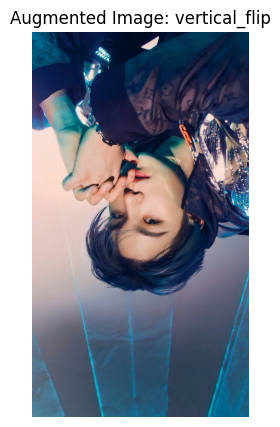

Applied augmentation: horizontal_flip


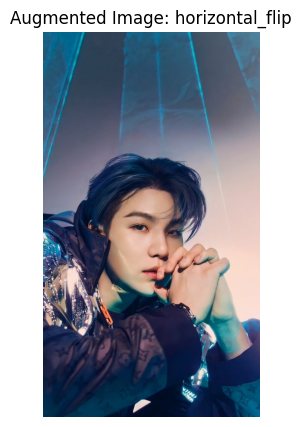

Applied augmentation: blur_noise


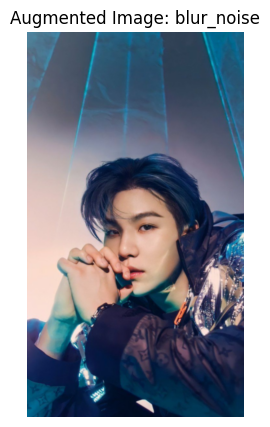

Applied augmentation: rotation


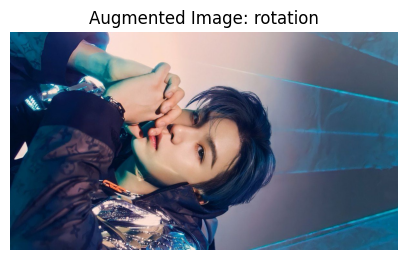

Applied augmentation: shear on y-axis


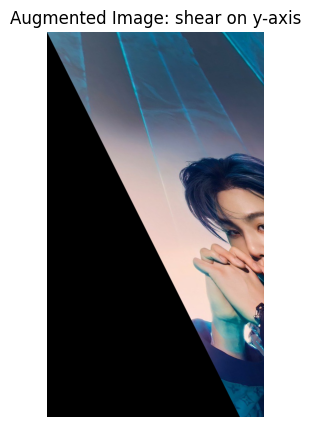

Applied augmentation: shear on x-axis


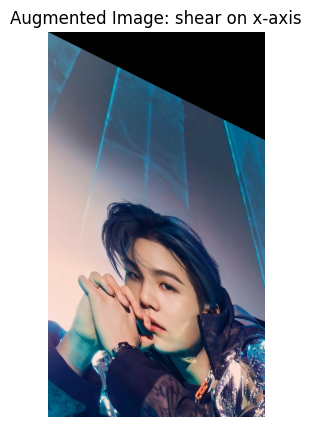

Applied augmentation: zoom


Applied augmentation: add noise


In [ ]:
'''Data augmentation is a crucial technique in deep learning. By artificially expanding
the training dataset, it enhances model performance and generalization. For instance,
in image classification, we can apply transformations like rotation, flipping, and zooming to create diverse examples.
This variety prevents overfitting and allows models
to learn robust features. Data augmentation finds relevance in various applications,
including object detection, image recognition.
Tasks
1. Please complete the function in the starter notebook which accepts and image
and a type of augmentation to perform. Use the parameters described in the
comment section of each augmentation.
2. Despite data augmentation being good, not all transformations are valid, and it is
therefore important to consider the problem you are trying to solve. Considering
the problem of facial recognition, state if the transforms given in the starter
notebook will be valid or not.
3. Add any two transforms not included in the starter code that is relevant to face
recognition model.'''
import random

## Use your own images to test.
def data_augmentation(img, type):
    if type=="resize1":
        # resize the  image to 224 x 224 use nearest neighbor
        img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_NEAREST)
    elif type=="resize2":
        # resize the  image to 224 x 224 use cubic spline interpolation
        img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_CUBIC)
    elif type=="vertical_flip":
        # flip the image vertically
        img = cv2.flip(img, 0)
    elif type=="horizontal_flip":
        # flip the image horizontally
        img = cv2.flip(img, 1)
    elif type=="blur_noise":
        # flip the image horizontally
        img = cv2.GaussianBlur(img, (5,5), 0)
    elif type=="rotation":
        # use your own parameters
        img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    elif type=="shear on y-axis":
        # use your own parameters
        img = cv2.warpAffine(img, np.float32([[1, 0.5, 0], [0,1,0]]), (img.shape[1], img.shape[0]))
    elif type=="shear on x-axis":
        # use your own parameters
        img = cv2.warpAffine(img, np.float32([[1, 0, 0], [0.5,1,0]]), (img.shape[1], img.shape[0]))
    elif type == "zoom":
        # Apply random zoom to the image
        zoom_factor = random.uniform(0.9, 1.8)  # Random zoom factor between 0.8 and 1.2
        h, w = img.shape[:2]
        center = (w // 2, h // 2)
        rot_mat = cv2.getRotationMatrix2D(center, 0, zoom_factor)  # Zoom without rotation
        img = cv2.warpAffine(img, rot_mat, (w, h))
    elif type == "add_noise":
        # Add Gaussian noise to the image
        noise = np.random.normal(0, 25, img.shape).astype(np.uint8)  # Gaussian noise with mean 0 and stddev 25
        img = cv2.add(img, noise)  # Add the noise to the image

    return img

img_path = "q4_data/q4a.jpg"
img = cv2.imread(img_path)

# Apply resize with nearest neighbor interpolation
img_augmentation = data_augmentation(img, "resize1")
print("Applied augmentation: resize1")
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(img_augmentation, cv2.COLOR_BGR2RGB))
plt.title("Augmented Image: resize1")
plt.axis("off")
plt.show()

# Apply resize with cubic spline interpolation
img_augmentation = data_augmentation(img, "resize2")
print("Applied augmentation: resize2")
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(img_augmentation, cv2.COLOR_BGR2RGB))
plt.title("Augmented Image: resize2")
plt.axis("off")
plt.show()

# Apply vertical flip
img_augmentation = data_augmentation(img, "vertical_flip")
print("Applied augmentation: vertical_flip")
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(img_augmentation, cv2.COLOR_BGR2RGB))
plt.title("Augmented Image: vertical_flip")
plt.axis("off")
plt.show()

# Apply horizontal flip
img_augmentation = data_augmentation(img, "horizontal_flip")
print("Applied augmentation: horizontal_flip")
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(img_augmentation, cv2.COLOR_BGR2RGB))
plt.title("Augmented Image: horizontal_flip")
plt.axis("off")
plt.show()

# Apply Gaussian blur (blur_noise)
img_augmentation = data_augmentation(img, "blur_noise")
print("Applied augmentation: blur_noise")
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(img_augmentation, cv2.COLOR_BGR2RGB))
plt.title("Augmented Image: blur_noise")
plt.axis("off")
plt.show()

# Apply rotation
img_augmentation = data_augmentation(img, "rotation")
print("Applied augmentation: rotation")
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(img_augmentation, cv2.COLOR_BGR2RGB))
plt.title("Augmented Image: rotation")
plt.axis("off")
plt.show()

# Apply shear on y-axis
img_augmentation = data_augmentation(img, "shear on y-axis")
print("Applied augmentation: shear on y-axis")
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(img_augmentation, cv2.COLOR_BGR2RGB))
plt.title("Augmented Image: shear on y-axis")
plt.axis("off")
plt.show()

# Apply shear on x-axis
img_augmentation = data_augmentation(img, "shear on x-axis")
print("Applied augmentation: shear on x-axis")
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(img_augmentation, cv2.COLOR_BGR2RGB))
plt.title("Augmented Image: shear on x-axis")
plt.axis("off")
plt.show()

# Apply zoom
img_augmentation = data_augmentation(img, "zoom")
print("Applied augmentation: zoom")
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(img_augmentation, cv2.COLOR_BGR2RGB))
plt.title("Augmented Image: zoom")
plt.axis("off")
plt.show()

# Apply add noise
img_augmentation = data_augmentation(img, "add_noise")
print("Applied augmentation: add noise")
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(img_augmentation, cv2.COLOR_BGR2RGB))
plt.title("Augmented Image: add noise")
plt.axis("off")
plt.show()